# Diagnostic Model for Chest Pain using Medical Indicators

### Section 009 Group 3 (Adeesh Devanand, Eddie Han, Connor Law, Burak Ozkan)

# 1) Introduction:

Heart disease is an umbrella term used to define a range of health conditions that **negatively affect** the health of **the heart** or more generally the cardiovascular system, such as **coronary artery disease** which is the narrowing of blood vessels by cholesterol deposits that, especially when it occurs in coronary arteries, **can lead to a heart attack** and sudden death (CDC, 2021). **Chest pain** is a symptom of a heart attack and indicates to the patient that they should seek immediate primary care (NHS, 2023). 

For our project, we would like to explore the following question: **can variables measured during the diagnosis of a heart disease be used to predict the type of chest pain a patient with heart disease might experience during a future heart attack?** We are using the "**Heart Disease Dataset**" by David Lapp, obtained from the Kaggle website (https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data) which contains data regarding patients' health predictors, specifically acquired from the **Cleveland data set**, for our model.

# 2) Preliminary Exploratory Data Analysis:

In [4]:
options(repr.matrix.max.rows = 6)
library(tidyverse)
library(tidymodels)
library(RColorBrewer)
library(rvest)
library(repr)

In [14]:
url <- read_csv("https://raw.githubusercontent.com/BurakMOzkan/DSCI100_group_3/main/heart.csv?token=GHSAT0AAAAAACJLJJFXZSUE74ZPWJICUPLUZJ57Y6A")
url

Rows: 1025 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [7]:
heart_disease <- url |>
                 select(age, cp, trestbps, chol, thalach) |>
                 rename(chest_pain_type = cp,
                        resting_bp = trestbps,
                        serum_cholesterol = chol,
                        max_heart_rate = thalach)
heart_disease

age,chest_pain_type,resting_bp,serum_cholesterol,max_heart_rate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52,0,125,212,168
53,0,140,203,155
70,0,145,174,125
⋮,⋮,⋮,⋮,⋮
47,0,110,275,118
50,0,110,254,159
54,0,120,188,113


In [9]:
hd_split <- initial_split(heart_disease, prop = 0.80, strata = chest_pain_type)
hd_train <- training(hd_split)
hd_test <- testing(hd_split) 
glimpse(hd_train)

Rows: 819
Columns: 5
$ age               <dbl> 52, 53, 70, 62, 58, 58, 54, 71, 43, 51, 54, 67, 45, …
$ chest_pain_type   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ resting_bp        <dbl> 125, 140, 145, 138, 100, 114, 122, 112, 132, 140, 12…
$ serum_cholesterol <dbl> 212, 203, 174, 294, 248, 318, 286, 149, 341, 298, 26…
$ max_heart_rate    <dbl> 168, 155, 125, 106, 122, 140, 116, 125, 136, 122, 10…


In [10]:
chest_pain_prop <- hd_train |>
                   group_by(chest_pain_type) |>
                   summarize(n = n()) |>
                   mutate(percent = 100*n/nrow(hd_train))

chest_pain_prop

average_predictor <- hd_train |>
                     select(age, resting_bp, serum_cholesterol, max_heart_rate) |>
                     map_dfr(mean)
average_predictor

chest_pain_type,n,percent
<dbl>,<int>,<dbl>
0,396,48.351648
1,135,16.483516
2,226,27.594628
3,62,7.570208


age,resting_bp,serum_cholesterol,max_heart_rate
<dbl>,<dbl>,<dbl>,<dbl>
54.64347,131.1392,246.84,148.8388


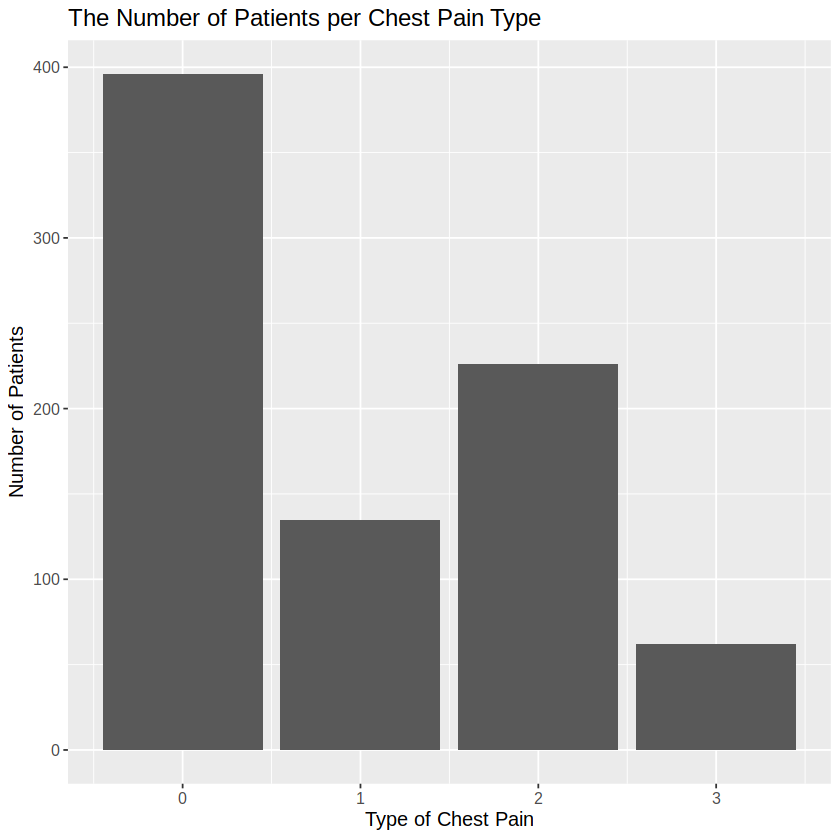

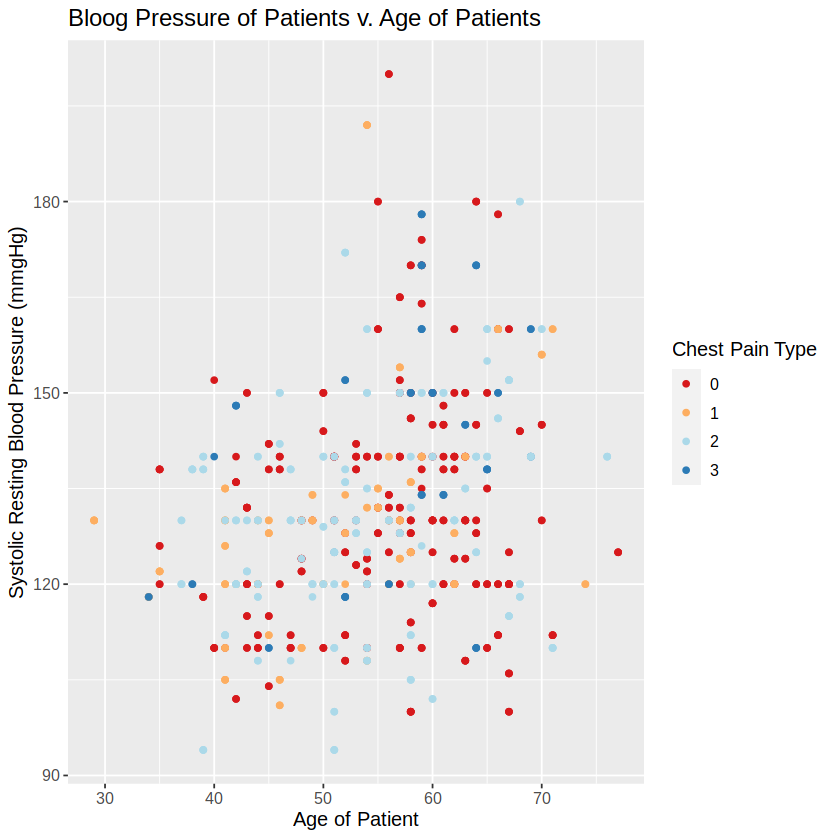

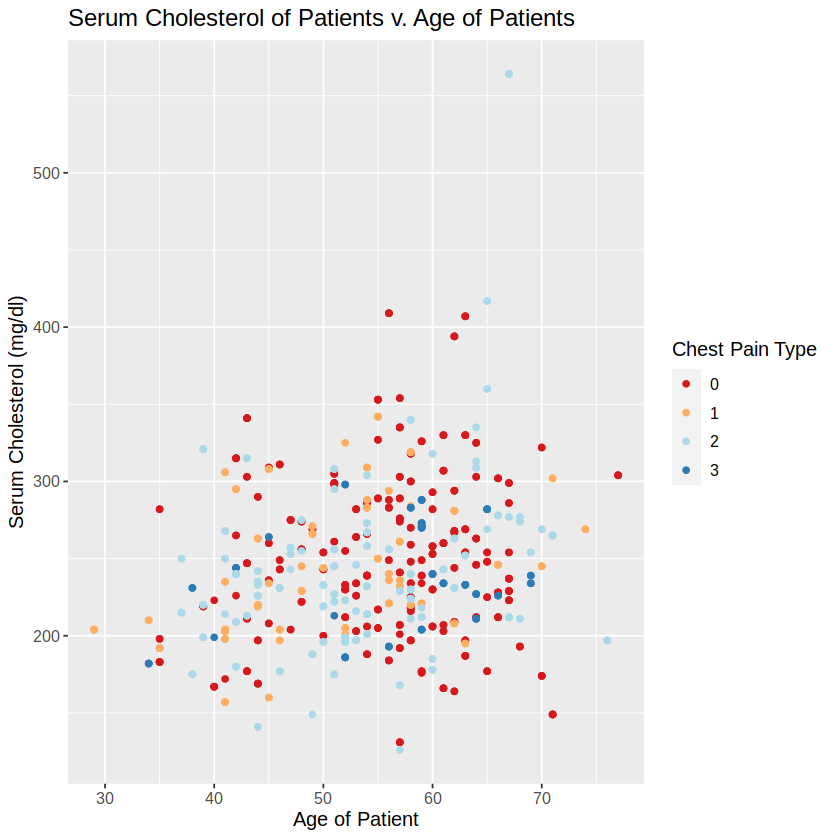

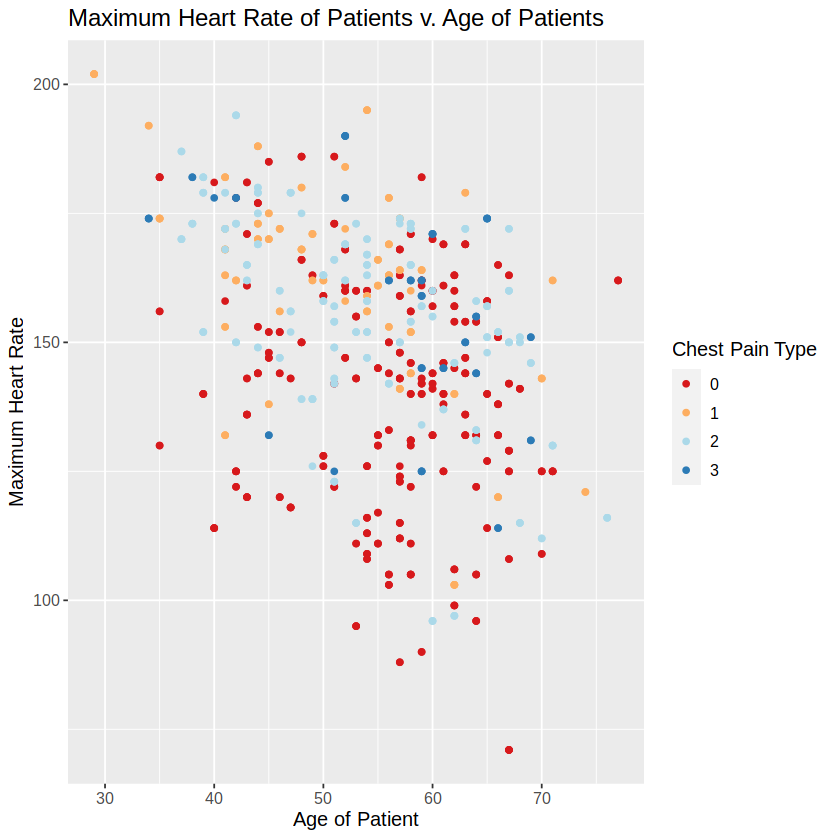

In [11]:
chest_pain_bar <- hd_train |>
                  ggplot(aes(x = chest_pain_type)) +
                  geom_bar() +
                  labs(x = "Type of Chest Pain", y = "Number of Patients",  fill = "Chest Pain Type") +
                  ggtitle("The Number of Patients per Chest Pain Type") +
                  theme(text = element_text(size = 12)) 
chest_pain_bar

resting_bp_plot <- hd_train |>
                   ggplot(aes(x = age, y = resting_bp, color = as_factor(chest_pain_type))) +
                   geom_point() +
                   labs(x = "Age of Patient", y = "Systolic Resting Blood Pressure (mmgHg)",  color = "Chest Pain Type") +
                   ggtitle("Bloog Pressure of Patients v. Age of Patients") +
                   theme(text = element_text(size = 12), legend.position = "right", legend.direction = "vertical") +
                   scale_color_brewer(palette = "RdYlBu")

chol_plot <- hd_train |>
                   ggplot(aes(x = age, y = serum_cholesterol, color = as_factor(chest_pain_type))) +
                   geom_point() +
                   labs(x = "Age of Patient", y = "Serum Cholesterol (mg/dl)",  color = "Chest Pain Type") +
                   ggtitle("Serum Cholesterol of Patients v. Age of Patients") +
                   theme(text = element_text(size = 12), legend.position = "right", legend.direction = "vertical") +
                   scale_color_brewer(palette = "RdYlBu")

max_hr_plot <- hd_train |>
                   ggplot(aes(x = age, y = max_heart_rate, color = as_factor(chest_pain_type))) +
                   geom_point() +
                   labs(x = "Age of Patient", y = "Maximum Heart Rate",  color = "Chest Pain Type") +
                   ggtitle("Maximum Heart Rate of Patients v. Age of Patients") +
                   theme(text = element_text(size = 12), legend.position = "right", legend.direction = "vertical") +
                   scale_color_brewer(palette = "RdYlBu")


resting_bp_plot
chol_plot
max_hr_plot

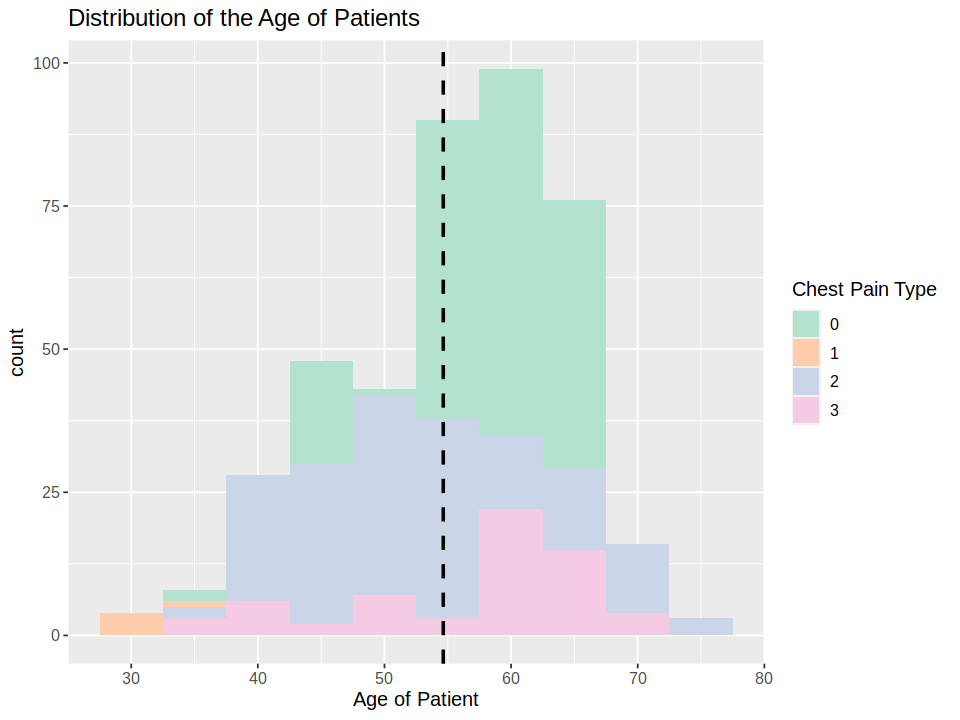

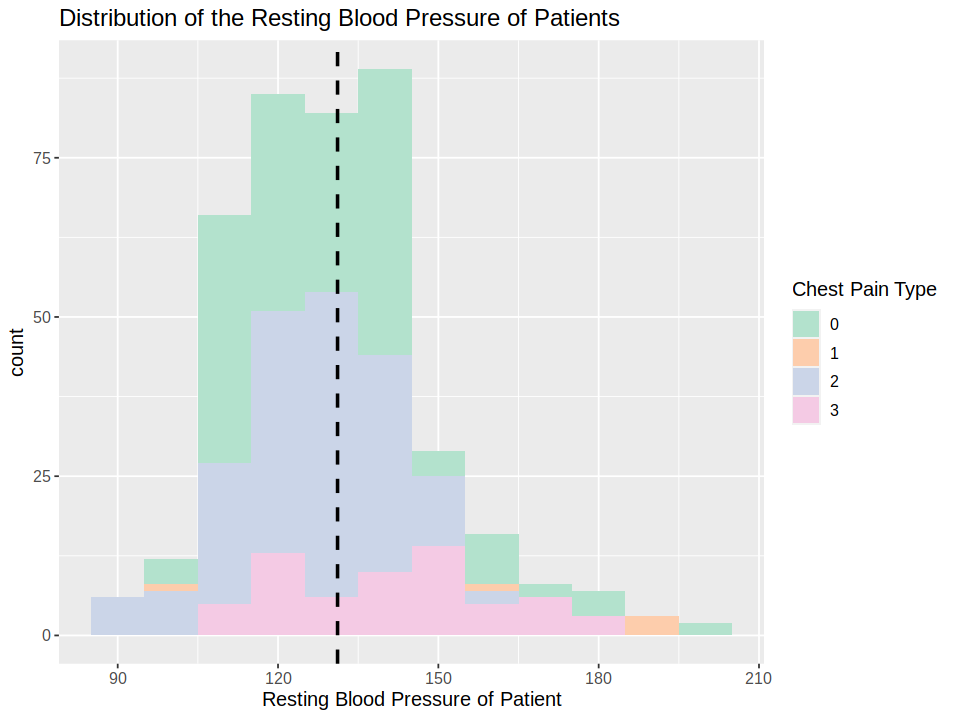

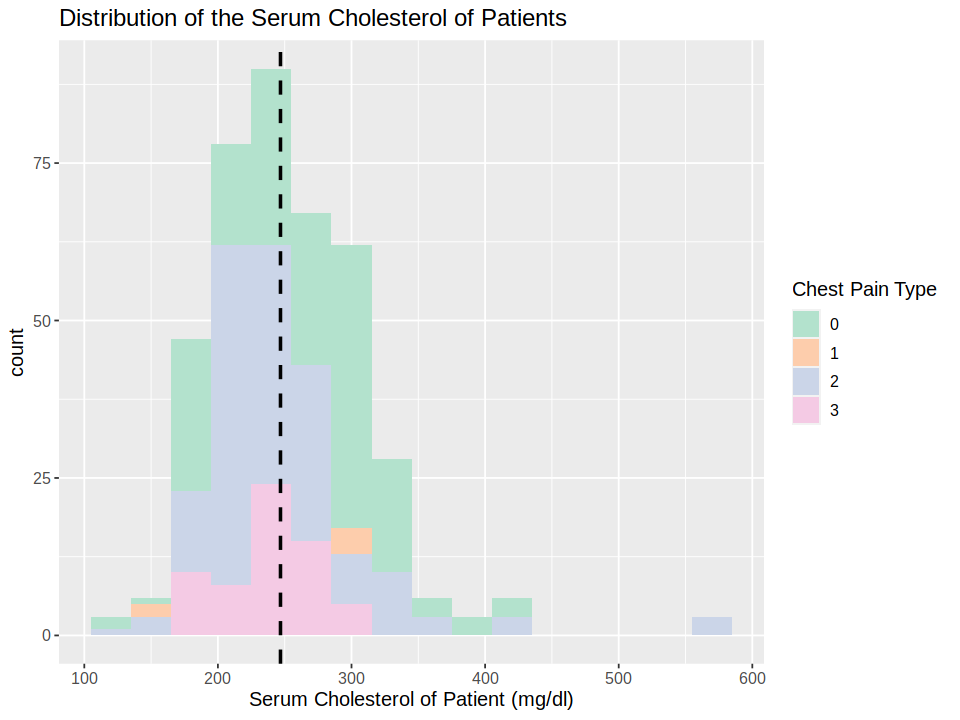

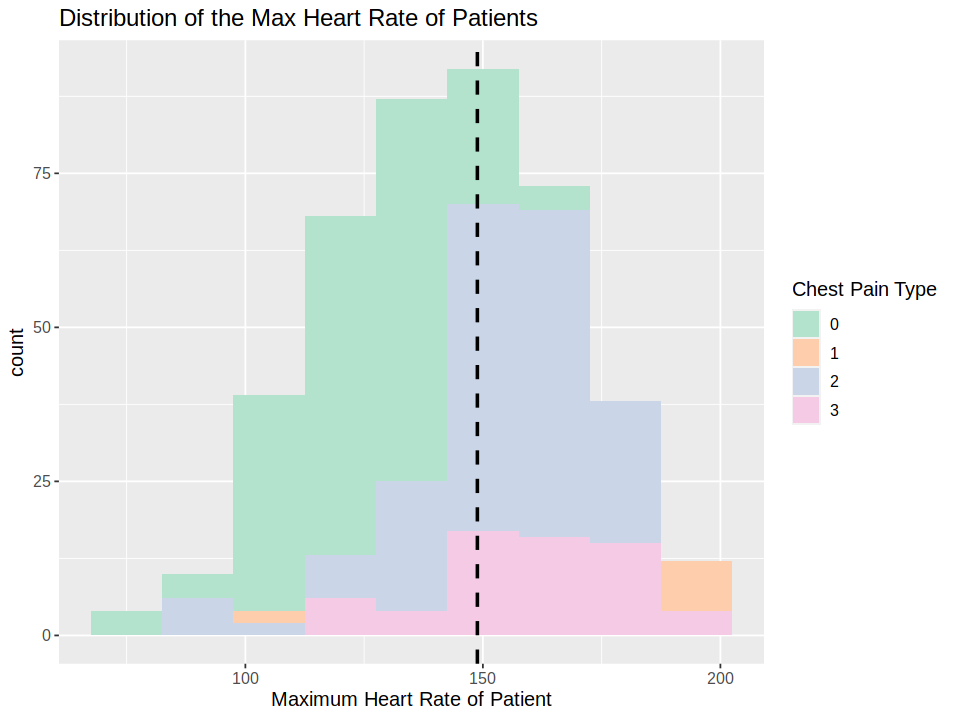

In [12]:
options(repr.plot.width = 8, repr.plot.height = 6)

age_histogram <- hd_train |>
    ggplot(aes(x = age, fill = as_factor(chest_pain_type))) +
    geom_histogram(position = "identity", binwidth = 5) +
    geom_vline(xintercept = as.numeric(average_predictor[1,1]), 
               linetype = "dashed", linewidth = 1) +
    labs(x = "Age of Patient", fill = "Chest Pain Type") +
    ggtitle("Distribution of the Age of Patients") +
    theme(text = element_text(size = 12), legend.position = "right", legend.direction = "vertical") +
    scale_fill_brewer(palette = "Pastel2")

bp_histogram <- hd_train |>
    ggplot(aes(x = resting_bp, fill = as_factor(chest_pain_type))) +
    geom_histogram(position = "identity", binwidth = 10) +
    geom_vline(xintercept = as.numeric(average_predictor[1,2]), 
               linetype = "dashed", linewidth = 1) +
    labs(x = "Resting Blood Pressure of Patient", fill = "Chest Pain Type") +
    ggtitle("Distribution of the Resting Blood Pressure of Patients") +
    theme(text = element_text(size = 12), legend.position = "right", legend.direction = "vertical") +
    scale_fill_brewer(palette = "Pastel2")

chol_histogram <- hd_train |>
    ggplot(aes(x = serum_cholesterol, fill = as_factor(chest_pain_type))) +
    geom_histogram(position = "identity", binwidth = 30) +
    geom_vline(xintercept = as.numeric(average_predictor[1,3]), 
               linetype = "dashed", linewidth = 1) +
    labs(x = "Serum Cholesterol of Patient (mg/dl)", fill = "Chest Pain Type") +
    ggtitle("Distribution of the Serum Cholesterol of Patients") +
    theme(text = element_text(size = 12), legend.position = "right", legend.direction = "vertical") +
    scale_fill_brewer(palette = "Pastel2")

hr_histogram <- hd_train |>
    ggplot(aes(x = max_heart_rate, fill = as_factor(chest_pain_type))) +
    geom_histogram(position = "identity", binwidth = 15) +
    geom_vline(xintercept = as.numeric(average_predictor[1,4]), 
               linetype = "dashed", linewidth = 1) +
    labs(x = "Maximum Heart Rate of Patient", fill = "Chest Pain Type") +
    ggtitle("Distribution of the Max Heart Rate of Patients") +
    theme(text = element_text(size = 12), legend.position = "right", legend.direction = "vertical") +
    scale_fill_brewer(palette = "Pastel2")

age_histogram
bp_histogram
chol_histogram
hr_histogram

# 3) Methods:

We will be using the ```cp - chest pain type (4 values)``` as the response variable. The classifications are zero to three and their descriptions are as follows:

0. non-cardiac causes OR no chest pain.
1. mild or minor chest discomfort, usually of non-cardiac origin.
2. moderate chest pain, which may have cardiac or non-cardiac origins.
3. severe or intense chest pain requiring immediate medical attention.

We eliminated all other categorical variables and focused on predictors that are either measurable or well understood by the general public. The **four predictors** are:

```
1 - age 
2 - trestbps   (renamed resting_bp)
3 - chol       (renamed serum_cholesterol)
4 - thalach    (renamed max_heart_rate)
```

We will be using the **K-nearest neighbors (KNN)** algorithm to **classify** the chest pain of new patients (observations). Having split our data into a training and testing data set, we will create our model and fit it accordingly, while employing cross-validation.

We will be **visualizing** our data as **four scatter plots**, one per predictor, while chest pain types are highlighted by the difference in colour. 

In addition, after having split our data into the training and testing data, we visualized the distribution of the chest pain types in patients using a **bar plot**.

# 4) Expected Outcomes and Significance:

We are hoping to find a relation between the predictors of health and chest pain type. Our hypothesis is that **HIGHER** age, resting blood pressure, serum cholesterol, and maximum heart, will correlate with **worse chest pain**.

The general public could get an idea of the **type of chest pain** they could experience **during a suspected heart attack** and to immediately seek medical attention if they experience it. 

We only seek to **encourage patients to be in tune with their health** and spark the conversation of heart disease among the public, not replacing the need for a medical diagnosis of a physician. 

It would be interesting to cross-check whether these predictors are also a **good indicator of heart disease** and to see **which chest pain type** is **most correlated** with heart disease. 

# References

Centers for Disease Control and Prevention. (2021, July 19). Coronary artery disease. Centers for Disease Control and Prevention. https://www.cdc.gov/heartdisease/coronary_ad.htm#:~:text=Print-,Coronary%20Artery%20Disease,This%20process%20is%20called%20atherosclerosis. 

NHS. (n.d.). Heart Attack. NHS choices. 
https://www.nhs.uk/conditions/heart-attack/symptoms/ 
